In [0]:
import pyspark

In [0]:
df = sqlContext.sql("SELECT * FROM image012_overlap_4_csv")
input_data = df.select("*").toPandas()

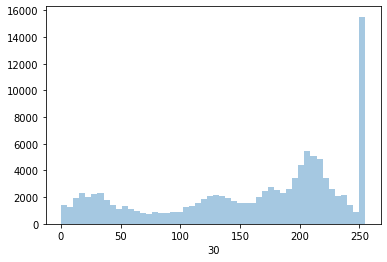

In [0]:
import seaborn as sns
display(sns.distplot(input_data['30'],kde=False))

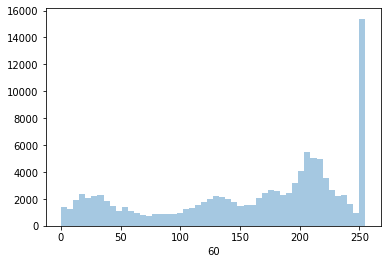

In [0]:
import seaborn as sns
display(sns.distplot(input_data['60'],kde=False))

In [0]:
input_data.isna().any()

Out[12]: _c0 False
0 False
1 False
2 False
3 False
 ... 
60 False
61 False
62 False
63 False
64 False
Length: 66, dtype: bool

In [0]:
from sklearn.model_selection import train_test_split
 
train, test = train_test_split(input_data,test_size=0.2, random_state=123)
X_train = train.drop(["64"], axis=1)
X_test = test.drop(["64"], axis=1)
y_train = train['64']
y_test = test['64']

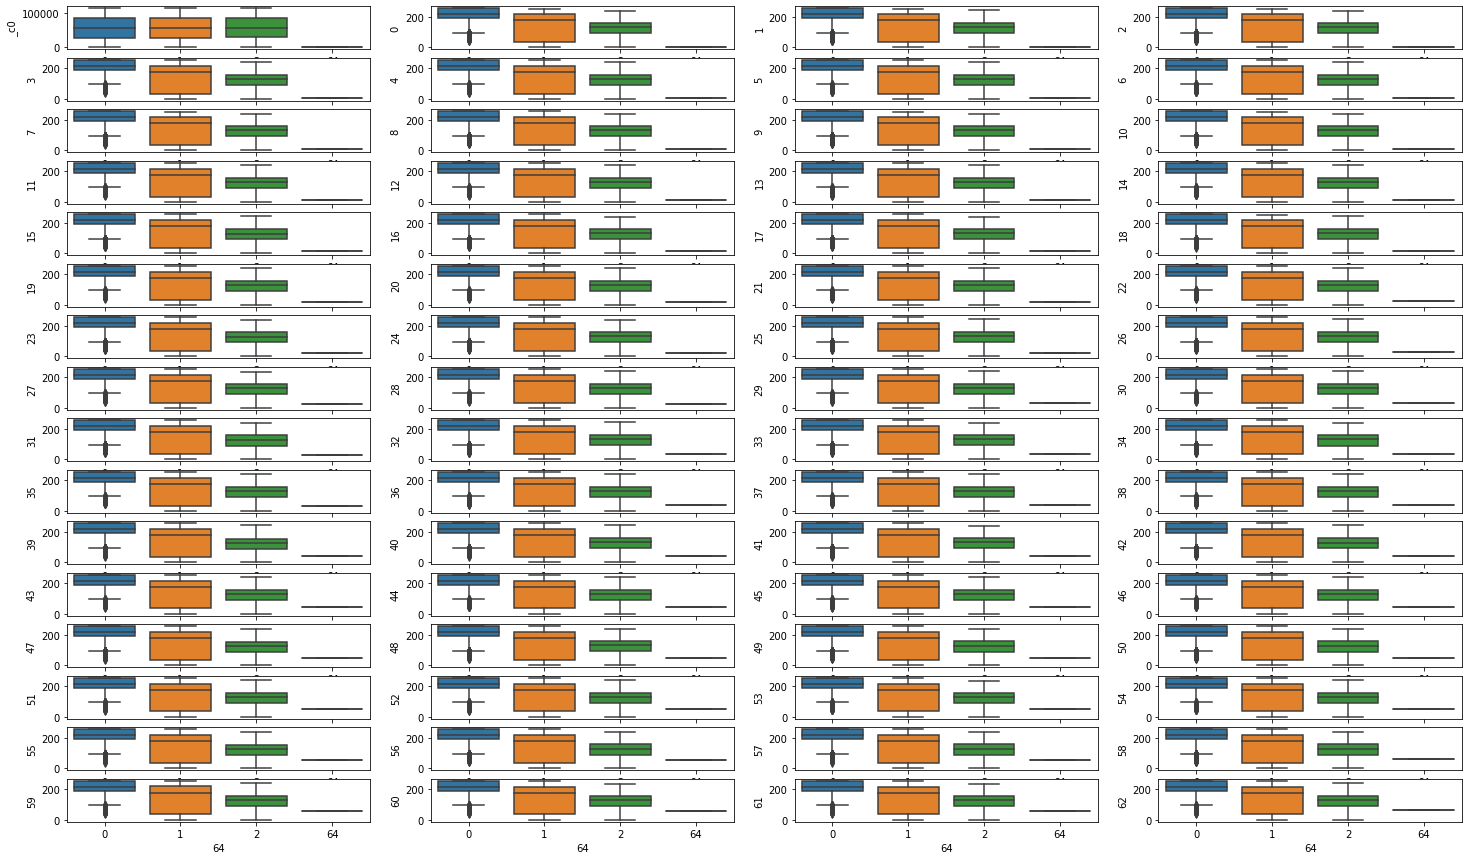

In [0]:

import matplotlib.pyplot as plt
dims = (16, 4)
f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))
axis_i, axis_j = 0, 0
for col in input_data.columns:
  if col == '64':
    continue # Box plots cannot be used on indicator variables
  sns.boxplot(x = y_train, y=input_data[col], ax=axes[axis_i, axis_j])
  axis_j += 1
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

In [0]:
from sklearn.ensemble import RandomForestClassifier
randomFClassifier = RandomForestClassifier(random_state=0,n_estimators=1500,oob_score=True, n_jobs=1)
randomFClassifier = randomFClassifier.fit(X_train, y_train)

In [0]:
y_pred = randomFClassifier.predict(X_test)

In [0]:
importance = randomFClassifier.feature_importances_
indices = importance.argsort()[::-1]
print(importance)

[0.00347705 0.03018998 0.02300774 0.02002552 0.0177066 0.02037681
 0.01905764 0.02141806 0.02628454 0.01761846 0.01081692 0.01069097
 0.00924194 0.00939979 0.01128541 0.01485124 0.01873256 0.01224667
 0.01057092 0.00788512 0.00637288 0.00703058 0.00890772 0.00895991
 0.01764464 0.01227013 0.00790019 0.00757183 0.0062683 0.00676773
 0.00677853 0.00957743 0.01632343 0.01532022 0.00935234 0.00927871
 0.00630012 0.00604521 0.00767248 0.00902758 0.01879074 0.01418444
 0.0100671 0.01010855 0.00956135 0.00921445 0.01053417 0.01441326
 0.02364142 0.01466857 0.01158855 0.01252767 0.01499899 0.01883413
 0.0233188 0.02656263 0.03038406 0.02374582 0.0182666 0.02569026
 0.02689209 0.02734204 0.02643333 0.03565735 0.04231971]

In [0]:
pred_prob = randomFClassifier.predict_proba(X_test)

In [0]:

from sklearn.metrics import roc_curve, auc
fpr = {}
tpr = {}
threshold = {}
n_classes = 3
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], threshold[i] = roc_curve(y_test, pred_prob[:, i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

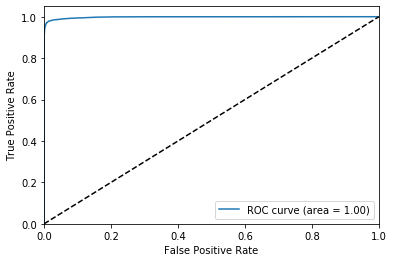

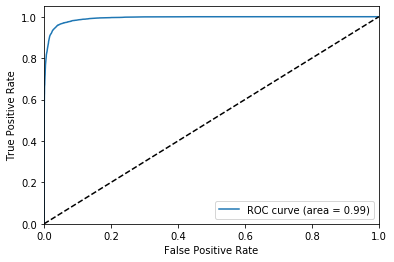

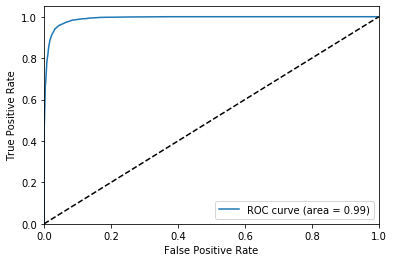

In [0]:
import matplotlib.pyplot as plt
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [0]:

from sklearn.metrics import accuracy_score
auccuracy = accuracy_score(y_test, y_pred)
print(auccuracy)


0.9519838483146067

In [0]:
from sklearn.metrics import confusion_matrix
CC_test = confusion_matrix(y_test, y_pred)
print(CC_test)

[[7735 81 138]
 [ 77 8071 301]
 [ 56 441 5884]]